<a href="https://colab.research.google.com/github/peramdurgashankar18/Ml-Assignments/blob/main/Assigment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA on Used Cars Dataset**

**Explorative Data Analysis (EDA):**
      Exploratory Data Analysis is one of the important steps in the data analysis process. Here, the focus is on making sense of the data in hand — things like formulating the correct questions to ask to your dataset, how to manipulate the data sources to get the required answers, and others.

The main goal is to explore the data on the used cars dataset details.

The necessary libraries are imported such as Matplotlib, Seaborn, Pandas, Numpy.



In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

A used cars dataset typically contains information about pre-owned vehicles available for sale. This type of dataset is valuable for analyzing trends in the automotive market, determining factors influencing vehicle prices, and building predictive models for pricing or customer preferences.

In [29]:
data = pd.read_csv('/content/used_car_dataset.csv')
data

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"
...,...,...,...,...,...,...,...,...,...,...,...
9577,Skoda,Octavia,2014,10,"105,904 km",Automatic,second,Diesel,Oct-24,"Skoda Octavia 1.9 Elegance TDI, 2014, Diesel","₹ 10,40,000"
9578,Maruti Suzuki,Alto-800,2020,4,"55,000 km",Manual,first,Hybrid/CNG,Nov-24,"Maruti Suzuki Alto 800 CNG LXI Optional, 2020,...","₹ 3,75,000"
9579,Maruti Suzuki,Ritz,2013,11,"92,000 km",Manual,first,Diesel,Nov-24,"Maruti Suzuki Ritz VDi, 2013, Diesel","₹ 4,15,000"
9580,Hyundai,Verna,2019,5,"72,000 km",Automatic,first,Petrol,Oct-24,"Hyundai Verna VTVT 1.6 AT SX Option, 2019, Petrol","₹ 8,55,000"


## **Visualization Insights**

**1.Age Distribution:**

*   Most vehicles in the dataset are between 5 to 15 years old.

*   There are a few very old vehicles (up to 38 years), indicating a wide range of ages.



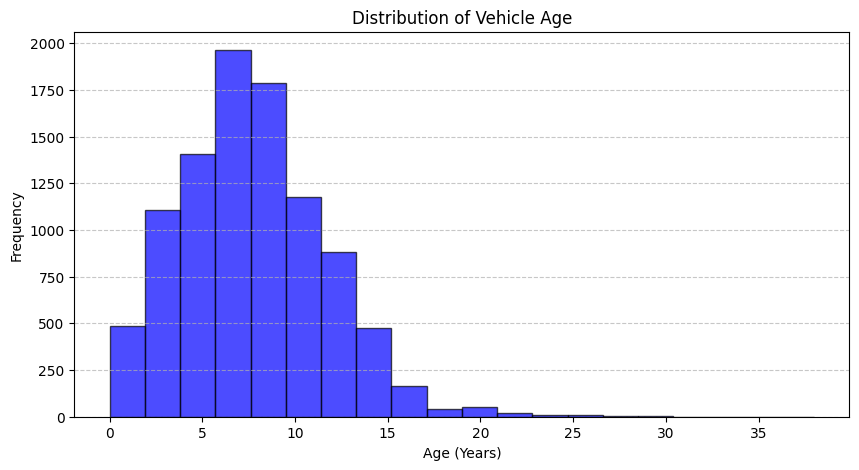

In [31]:
plt.figure(figsize=(10, 5))
plt.hist(data['Age'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Vehicle Age')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**2.Kilometers Driven:**

*   The majority of vehicles have driven under 150,000 km.
*   A long tail indicates some high-mileage vehicles.



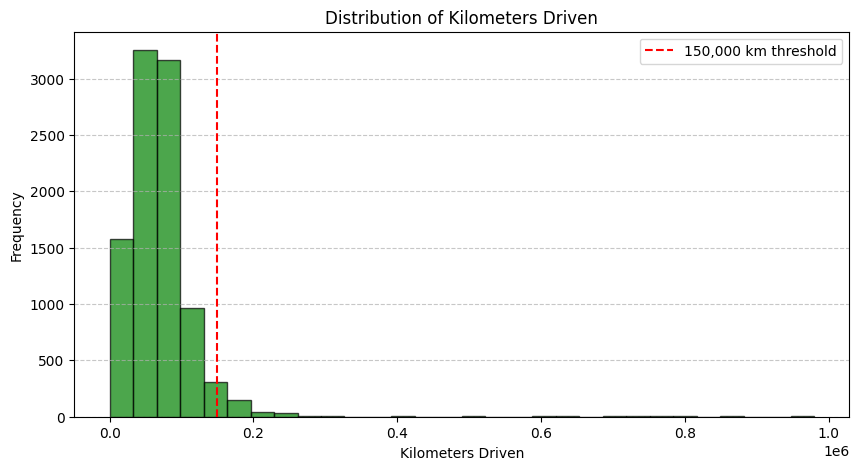

In [32]:
plt.figure(figsize=(10, 5))
plt.hist(data['kmDriven'], bins=30, color='green', edgecolor='black', alpha=0.7)
plt.axvline(x=150000, color='red', linestyle='--', label='150,000 km threshold')
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**3.Price by Fuel Type:**

*   Petrol and diesel vehicles show a wide range in prices.
*   Diesel vehicles generally appear to have higher price variability.




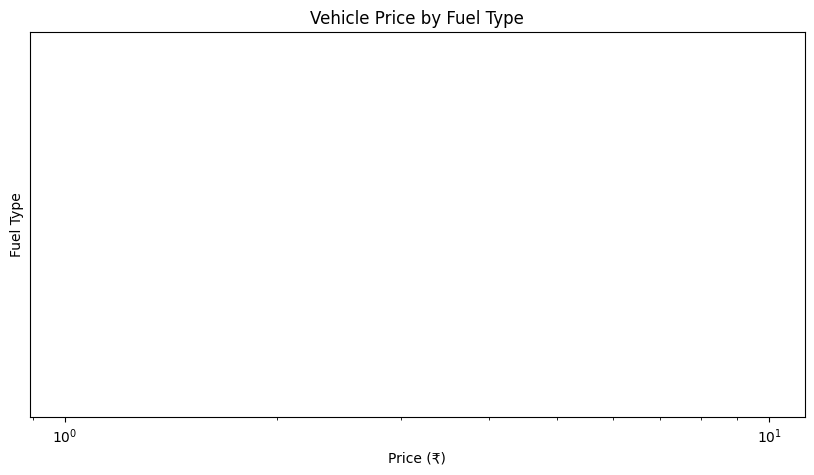

In [54]:
plt.figure(figsize=(10, 5))
fuel_types = data['FuelType'].unique()
box_data = [data[data['FuelType'] == fuel]['AskPrice'] for fuel in fuel_types]

plt.boxplot(box_data, vert=False, patch_artist=True,
            boxprops=dict(facecolor='orange', color='black'),
            medianprops=dict(color='blue', linewidth=2))

plt.yticks(range(1, len(fuel_types) + 1), labels=fuel_types)
plt.title('Vehicle Price by Fuel Type')
plt.suptitle("")
plt.xlabel('Price (₹)')
plt.ylabel('Fuel Type')
plt.xscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**4.Price vs. Age:**

*   Prices tend to decrease as vehicles age.
*   Petrol and diesel vehicles follow distinct patterns in price depreciation.



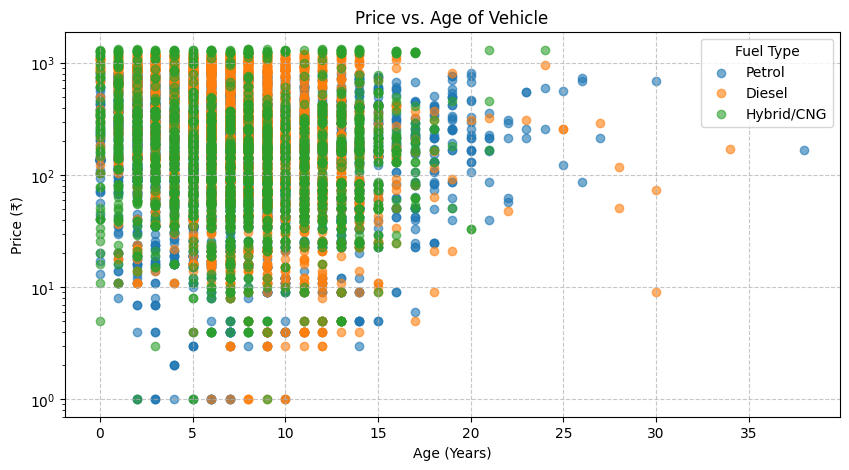

In [ ]:
plt.figure(figsize=(10, 5))
for fuel_type in data['FuelType'].unique():
    subset = data[data['FuelType'] == fuel_type]
    plt.scatter(subset['Age'], subset['AskPrice'], label=fuel_type, alpha=0.6)

plt.title('Price vs. Age of Vehicle')
plt.xlabel('Age (Years)')
plt.ylabel('Price (₹)')
plt.yscale('log')
plt.legend(title='Fuel Type')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

**Conclusion:**      
      The analysis of the used car dataset has revealed several important insights into the factors influencing car prices and market trends. It is evident that car age, mileage, brand, and model are significant determinants of price, with older cars and those with higher mileage generally commanding lower prices. Additionally, certain car brands and models are more desirable, leading to higher resale values, while seasonal fluctuations show that prices tend to be higher during the spring and summer months. The condition of the car and its additional features, such as advanced safety systems or luxury upgrades, also play a crucial role in determining its price. Regional variations further demonstrate that local preferences and climate can influence the demand for certain car types, such as SUVs or trucks. This analysis provides valuable insights for both buyers and sellers, with sellers encouraged to maintain their cars' condition and consider timing for optimal sales, while buyers should be mindful of pricing trends and the factors that influence car values. Overall, the dataset serves as a useful tool for understanding the used car market and can guide future decisions related to pricing, buying, and selling strategies.